# Import the libraries and data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!pip install boruta
!pip install optuna
!pip install shap
! pip install dtreeviz
from dtreeviz.trees import dtreeviz

import shap

import warnings
warnings.simplefilter('ignore')

path = "/content/drive/My Drive/Master_Research/workspace/data"
# # Local
# path = '../data'

# Import the user-defined modules
import sys
sys.path.append(path+'/../src')
import preparing_for_rwcv
from preparing_for_rwcv import *
import building_models
from building_models import *

     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 307kB 5.7MB/s 
     |████████████████████████████████| 174kB 39.5MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
     |████████████████████████████████| 81kB 7.1MB/s 
     |████████████████████████████████| 143kB 43.9MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 112kB 39.7MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11136 sha256=89f0b27f66ccafb396b0d08f0a1d4fda24536efaf8f0858b7818536531a1d660
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip
     |████████████████████████████████| 358kB 4.3MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491620 sha256=2d1444691aecad0151688cf3ff6d384abddd32c0340f547220e19fab304fccb5
  Stored in directory: /root/.cache/pip/wheels/15/27/f

# Experiment

## RFC

## Rolling Window Cross Validation

In [ ]:
dataset = "BlockchainAltcoinMacro"
DV_shifts = 1
IV_lags = 2
n_train_days = 480
n_valid_days = 60
n_test_days = 60
DV_colname = "BTC_Price_LogReturn_binary"
metric = f1_score
feature_selection = True

df = pd.read_pickle(path+"/03_primary/blockchain_altcoin_macro.pickle")

In [ ]:
# Generate dependent variable for the whole data range
df["BTC_Price_LogReturn"] = np.log1p(df["BTC_Price"]).diff(periods=DV_shifts)
df["BTC_Price_LogReturn_binary"] = (df["BTC_Price_LogReturn"] > 0).astype(int)
df = df.dropna()

# Set the initial day as the starting day of training and split the dataset by using the "split_ts" function
train_start = df.index[120]
train, valid, test, test_end = split_ts(df, train_start, n_train_days=n_train_days, n_valid_days=n_valid_days, n_test_days=n_test_days)

In [ ]:
optimized_model, best_params, full_preprocessed, X_train_valid, y_train_valid, X_test_preprocessed, y_test_preprocessed, ModelPred_train_valid, ModelPred_test = \
RFC(train, valid, test, DV_colname, DV_shifts, IV_lags, metric, feature_selection)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	237
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	237
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	237
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	237
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	237
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	237
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	237
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	237
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	237
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	237
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	237
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	237
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	23
Tentative: 	18
Rejected: 	196
Iteration: 	14 / 100
Confirmed: 	23
Tentative: 	18
Rejected: 	196
Iteration: 	15 / 100
Confirmed: 	23
Tentative: 	18
Rejected: 	196
Iteration: 	16 / 100
Confirmed: 	23
Tentati

[I 2021-06-10 15:27:43,932] A new study created in memory with name: no-name-ed5df08f-be5e-4bbb-b496-5e21830e6b51


Iteration: 	99 / 100
Confirmed: 	27
Tentative: 	3
Rejected: 	207


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	27
Tentative: 	2
Rejected: 	207


[I 2021-06-10 15:27:45,394] Trial 0 finished with value: 0.875 and parameters: {'max_depth': 6, 'n_estimators': 658}. Best is trial 0 with value: 0.875.
[I 2021-06-10 15:27:46,763] Trial 1 finished with value: 0.875 and parameters: {'max_depth': 7, 'n_estimators': 616}. Best is trial 0 with value: 0.875.
[I 2021-06-10 15:27:47,569] Trial 2 finished with value: 0.875 and parameters: {'max_depth': 6, 'n_estimators': 363}. Best is trial 0 with value: 0.875.
[I 2021-06-10 15:27:47,775] Trial 3 finished with value: 0.8461538461538461 and parameters: {'max_depth': 10, 'n_estimators': 83}. Best is trial 0 with value: 0.875.
[I 2021-06-10 15:27:48,559] Trial 4 finished with value: 0.8860759493670887 and parameters: {'max_depth': 4, 'n_estimators': 400}. Best is trial 4 with value: 0.8860759493670887.
[I 2021-06-10 15:27:49,638] Trial 5 finished with value: 0.9 and parameters: {'max_depth': 4, 'n_estimators': 554}. Best is trial 5 with value: 0.9.
[I 2021-06-10 15:27:50,928] Trial 6 finished wi

In [ ]:
optimized_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=39,
                       n_jobs=None, oob_score=False, random_state=201909,
                       verbose=0, warm_start=False)

In [ ]:
ModelPred_test

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [ ]:
import sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test_preprocessed, ModelPred_test))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79        31
           1       0.74      0.90      0.81        29

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



# SHAP

In [ ]:
# Create Tree explainer
explainer = shap.TreeExplainer(optimized_model)

In [ ]:
# Extract SHAP values to explain the model predictions
shap_values = explainer.shap_values(X_train_valid)

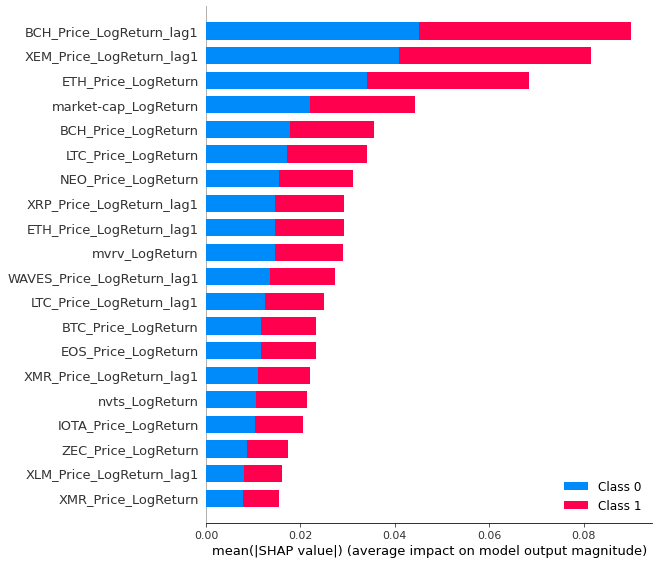

In [ ]:
# Plot Feature Importance
shap.summary_plot(shap_values, X_train_valid, plot_type="bar")

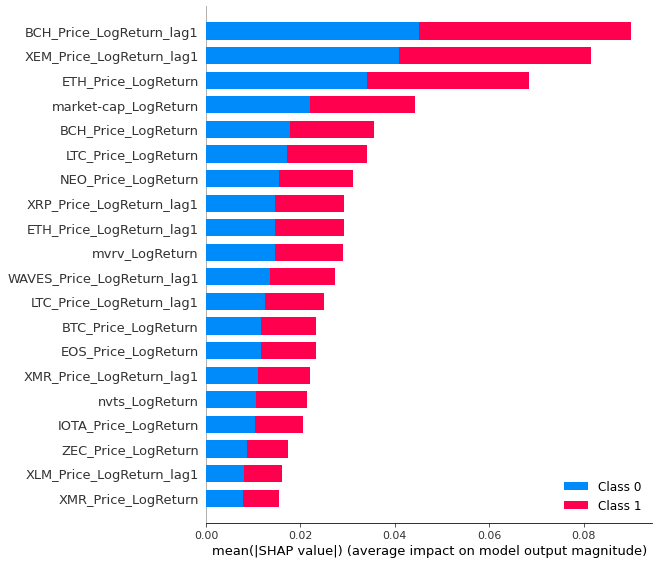

In [ ]:
# Plot Feature Importance
shap.summary_plot(shap_values, X_train_valid)

# Tree Visualization

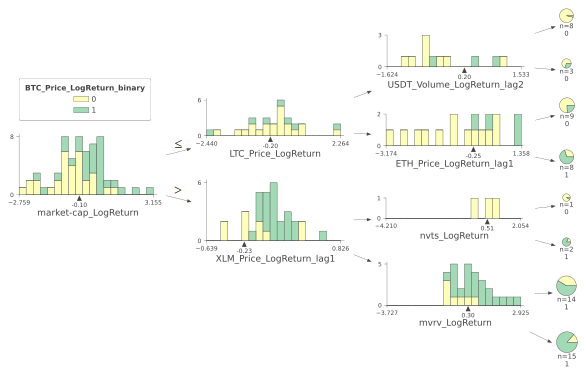

In [ ]:
estimators = optimized_model.estimators_
viz = dtreeviz(
    estimators[2],
    X_test_preprocessed, 
    y_test_preprocessed,
    target_name='BTC_Price_LogReturn_binary',
    feature_names=X_train_valid.columns,
    class_names=[str(i) for i in y_test_preprocessed.unique()],
    orientation='LR'
) 
display(viz);